In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import get_file

try:
    path = 'E:/Datasets/KDDCUP/kddcup.data.csv'
except:
    print('Error downloading')
    raise
    
print(path) 

df = pd.read_csv(path, header=None)

print("Read {} rows.".format(len(df)))

df.dropna(inplace=True,axis=1) # For now, just drop NA's 
# (rows with missing values)

# The CSV file has no column heads, so we are adding them here
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 5)

# display 5 rows
display(df[0:5])

E:/Datasets/KDDCUP/kddcup.data.csv
Read 4898431 rows.


,duration,protocol_type,...,dst_host_srv_rerror_rate,outcome
0,0,tcp,...,0.0,normal.
1,0,tcp,...,0.0,normal.
2,0,tcp,...,0.0,normal.
3,0,tcp,...,0.0,normal.
4,0,tcp,...,0.0,normal.


In [2]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

In [3]:
print("Read {} rows.".format(len(df)))
print('='*40)
print('The number of data points are:', df.shape[0])
print('='*40)
print('The number of features are:', df.shape[1])
print('='*40)
output = df['outcome'].values
labels = set(output)
print('The different type of output labels are:', labels)
print('='*125)
print('The number of different output labels are:', len(labels))

Read 4898431 rows.
The number of data points are: 4898431
The number of features are: 42
The different type of output labels are: {'smurf.', 'nmap.', 'teardrop.', 'guess_passwd.', 'portsweep.', 'back.', 'ftp_write.', 'spy.', 'warezmaster.', 'ipsweep.', 'land.', 'buffer_overflow.', 'rootkit.', 'loadmodule.', 'pod.', 'normal.', 'phf.', 'warezclient.', 'satan.', 'multihop.', 'neptune.', 'perl.', 'imap.'}
The number of different output labels are: 23


In [7]:
# Data Cleaning

# Checking for NULL values
print('Null values in dataset are',len(df[df.isnull().any(1)]))
print('='*40)

# Checkng for DUPLICATE values
df.drop_duplicates(keep='first', inplace = True)

# For now, just drop NA's (rows with missing values)
df.dropna(inplace=True,axis=1) 

# stored the data into a pickle file so we can load through
# df.to_pickle('df.pkl')

print("Read {} rows.".format(len(df)))

Null values in dataset are 0
Read 1074992 rows.


In [8]:
# Analyze KDD-99
analyze(df)


1074992 rows
** duration:9883 (0%)
** protocol_type:[tcp:91.03%,udp:7.86%,icmp:1.11%]
** service:[http:54.0%,private:18.49%,smtp:8.98%,domain_u:4.35%,ftp_data:3.76%,other:2.88%,finger:0.64%,eco_i:0.49%,ftp:0.48%,telnet:0.39%,ecr_i:0.35%,auth:0.31%,urp_i:0.25%,ntp_u:0.21%,pop_3:0.18%,time:0.11%,domain:0.1%,Z39_50:0.1%,gopher:0.1%,mtp:0.1%,whois:0.1%,uucp_path:0.1%,remote_job:0.1%,ssh:0.1%,ctf:0.1%,discard:0.1%,link:0.1%,name:0.1%,daytime:0.1%,iso_tsap:0.1%,netstat:0.1%,netbios_ns:0.1%,csnet_ns:0.1%,imap4:0.1%,pop_2:0.1%,rje:0.1%,klogin:0.1%,echo:0.1%,netbios_dgm:0.09%,sql_net:0.09%,nnsp:0.09%,supdup:0.09%,nntp:0.09%,netbios_ssn:0.09%,shell:0.09%,vmnet:0.09%,hostnames:0.09%,systat:0.09%,bgp:0.09%,ldap:0.09%,kshell:0.09%,sunrpc:0.09%,printer:0.09%,courier:0.09%,login:0.09%,http_443:0.09%,uucp:0.09%,efs:0.09%,exec:0.09%,IRC:0.05%,urh_i:0.01%,X11:0.01%,tim_i:0.0%,red_i:0.0%,pm_dump:0.0%,tftp_u:0.0%,harvest:0.0%,http_8001:0.0%,aol:0.0%,http_2784:0.0%]
** flag:[SF:73.19%,S0:18.94%,REJ:7.02%,

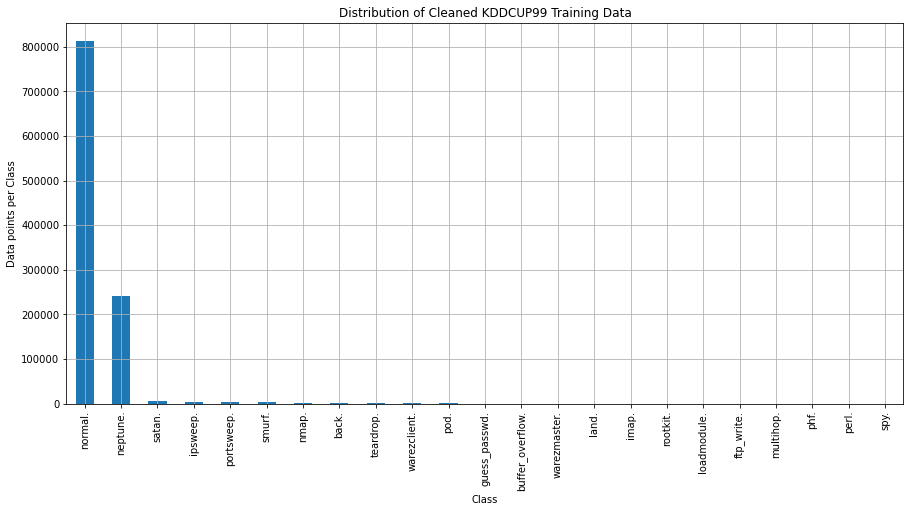

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(15,7))
class_distribution = df['outcome'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of Cleaned KDDCUP99 Training Data')
plt.grid()
plt.show()

In [11]:
# After Cleaning Data set for Duplicate
sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i], 
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class normal. : 812814 ( 75.611 %)
Number of data points in class neptune. : 242149 ( 22.526 %)
Number of data points in class satan. : 5019 ( 0.467 %)
Number of data points in class ipsweep. : 3723 ( 0.346 %)
Number of data points in class portsweep. : 3564 ( 0.332 %)
Number of data points in class smurf. : 3007 ( 0.28 %)
Number of data points in class nmap. : 1554 ( 0.145 %)
Number of data points in class back. : 968 ( 0.09 %)
Number of data points in class teardrop. : 918 ( 0.085 %)
Number of data points in class warezclient. : 893 ( 0.083 %)
Number of data points in class pod. : 206 ( 0.019 %)
Number of data points in class guess_passwd. : 53 ( 0.005 %)
Number of data points in class buffer_overflow. : 30 ( 0.003 %)
Number of data points in class warezmaster. : 20 ( 0.002 %)
Number of data points in class land. : 19 ( 0.002 %)
Number of data points in class imap. : 12 ( 0.001 %)
Number of data points in class rootkit. : 10 ( 0.001 %)
Number of data points i

In [12]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd
    
# Encode text values to dummy variables(i.e. [1,0,0],
# [0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [13]:
# Now encode the feature vector

encode_numeric_zscore(df, 'duration')
encode_text_dummy(df, 'protocol_type')
encode_text_dummy(df, 'service')
encode_text_dummy(df, 'flag')
encode_numeric_zscore(df, 'src_bytes')
encode_numeric_zscore(df, 'dst_bytes')
encode_text_dummy(df, 'land')
encode_numeric_zscore(df, 'wrong_fragment')
encode_numeric_zscore(df, 'urgent')
encode_numeric_zscore(df, 'hot')
encode_numeric_zscore(df, 'num_failed_logins')
encode_text_dummy(df, 'logged_in')
encode_numeric_zscore(df, 'num_compromised')
encode_numeric_zscore(df, 'root_shell')
encode_numeric_zscore(df, 'su_attempted')
encode_numeric_zscore(df, 'num_root')
encode_numeric_zscore(df, 'num_file_creations')
encode_numeric_zscore(df, 'num_shells')
encode_numeric_zscore(df, 'num_access_files')
encode_numeric_zscore(df, 'num_outbound_cmds')
encode_text_dummy(df, 'is_host_login')
encode_text_dummy(df, 'is_guest_login')
encode_numeric_zscore(df, 'count')
encode_numeric_zscore(df, 'srv_count')
encode_numeric_zscore(df, 'serror_rate')
encode_numeric_zscore(df, 'srv_serror_rate')
encode_numeric_zscore(df, 'rerror_rate')
encode_numeric_zscore(df, 'srv_rerror_rate')
encode_numeric_zscore(df, 'same_srv_rate')
encode_numeric_zscore(df, 'diff_srv_rate')
encode_numeric_zscore(df, 'srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_count')
encode_numeric_zscore(df, 'dst_host_srv_count')
encode_numeric_zscore(df, 'dst_host_same_srv_rate')
encode_numeric_zscore(df, 'dst_host_diff_srv_rate')
encode_numeric_zscore(df, 'dst_host_same_src_port_rate')
encode_numeric_zscore(df, 'dst_host_srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_serror_rate')
encode_numeric_zscore(df, 'dst_host_srv_serror_rate')
encode_numeric_zscore(df, 'dst_host_rerror_rate')
encode_numeric_zscore(df, 'dst_host_srv_rerror_rate')

# display 5 rows

df.dropna(inplace=True,axis=1)
df[0:5]
# This is the numeric feature vector, as it goes to the neural net


# Convert to numpy - Classification
x_columns = df.columns.drop('outcome')
x = df[x_columns].values
dummies = pd.get_dummies(df['outcome']) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values

In [51]:
import pandas as pd
import io
import requests
import numpy as np

import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Create a test/train split.  25% test
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

# Create neural net
model = Sequential()
model.add(Dense(128, input_dim=x.shape[1], activation='relu'))
model.add(Dense(256, input_dim=x.shape[1], activation='relu'))
model.add(Dense(128, input_dim=x.shape[1], activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(y.shape[1],activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt)

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
25196/25196 - 21s - loss: 0.1131 - val_loss: 0.0443
Epoch 2/1000
25196/25196 - 22s - loss: 0.0395 - val_loss: 0.0346
Epoch 3/1000
25196/25196 - 21s - loss: 0.0333 - val_loss: 0.0324
Epoch 4/1000
25196/25196 - 21s - loss: 0.0305 - val_loss: 0.0297
Epoch 5/1000
25196/25196 - 21s - loss: 0.0275 - val_loss: 0.0270
Epoch 6/1000
25196/25196 - 21s - loss: 0.0257 - val_loss: 0.0262
Epoch 7/1000
25196/25196 - 21s - loss: 0.0241 - val_loss: 0.0253
Epoch 8/1000
25196/25196 - 21s - loss: 0.0233 - val_loss: 0.0241
Epoch 9/1000
25196/25196 - 21s - loss: 0.0215 - val_loss: 0.0244
Epoch 10/1000
25196/25196 - 21s - loss: 0.0207 - val_loss: 0.0240
Epoch 11/1000
25196/25196 - 21s - loss: 0.0196 - val_loss: 0.0222
Epoch 12/1000
25196/25196 - 21s - loss: 0.0187 - val_loss: 0.0229
Epoch 13/1000
25196/25196 - 21s - loss: 0.0180 - val_loss: 0.0219
Epoch 14/1000
25196/25196 - 21s - loss: 0.0181 - val_loss: 0.0228
Epoch 15/1000
25196/25196 - 21s - loss: 0.0184 - val_loss: 0.0232
Epoch 16/1000
Resto

In [52]:
import tensorflow.keras.backend as K
print('Learning Rate - ')
print(K.eval(model.optimizer.lr)) 
print('==================================')
model.summary()

Learning Rate - 
1e-04
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 128)               16128     
_________________________________________________________________
dense_38 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_39 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 129       
_________________________________________________________________
dense_41 (Dense)             (None, 23)                46        
Total params: 82,223
Trainable params: 82,223
Non-trainable params: 0
_________________________________________________________________


In [37]:
import seaborn as sns
import datetime as dt

def confusion_matrix_func(y_test, y_test_pred):
    
    '''
    This function computes the confusion matrix using Predicted and Actual values and plots a confusion matrix heatmap
    '''
    C = confusion_matrix(y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    
    print(C)
    print("====================")
    print (cm_df)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmaster', 'rootkit', 
'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf', 'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    
    plt.show()

# calculate roc curve
from sklearn.metrics import *
#fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, pred)
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    pred = lb.transform(pred)
    return roc_auc_score(y_test, pred, average=average)

In [53]:
# Measure accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
# calculate roc curve
from sklearn.metrics import *
#fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, pred)
from sklearn import preprocessing

start = dt.datetime.now()

pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

escore = model.evaluate(x_test, y_test, batch_size=32)

y_eval = np.argmax(y_test,axis=1)

score = accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

8399/8399 [==============================] - 4s 457us/step - loss: 0.0222


C:\Users\Maruata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Completed
Time taken: 0:00:07.600370
Validation score: 0.9961897390864304
Evaluation score: 0.022187236696481705
Recall score: 0.9961897390864304
Precision score: 0.993773647143136
F1 Measure score: 0.9948896800875059
ROC-AUC score: 0.6597803206019415


In [50]:
#confusion_matrix(y_eval, pred)